### ANDREA CHIANG

Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

DATASET: Customer Shopping Trends Dataset from https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

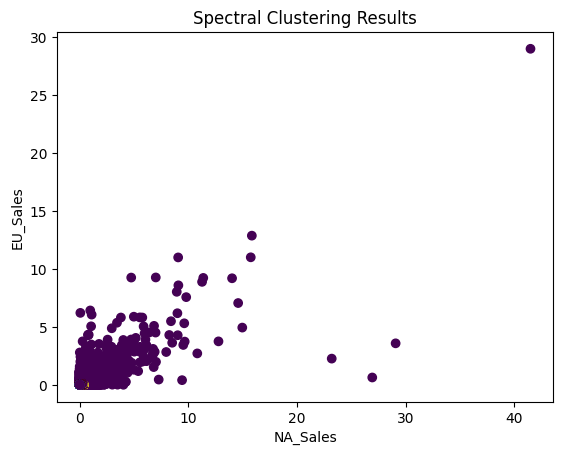

         NA_Sales  EU_Sales
Cluster                    
0        0.356343  0.200582
1        0.000000  0.000000
2        0.170000  0.020000
3        0.112256  0.034543


In [5]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Your Dataset
data = pd.read_csv('vgsales.csv')

# Extract relevant features
sales_features = data[['NA_Sales', 'EU_Sales']]

# Handling missing values (if any)
sales_features = sales_features.dropna()

# Standardize the features
scaler = StandardScaler()
scaled_sales_features = scaler.fit_transform(sales_features)

# Perform Spectral Clustering
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

# Assuming 'cluster_labels' contains the cluster assignments
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(data['NA_Sales'], data['EU_Sales'], c=data['Cluster'], cmap='viridis')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.title('Spectral Clustering Results')
plt.show()

# Analyze cluster characteristics
cluster_means = data.groupby('Cluster')[['NA_Sales', 'EU_Sales']].mean()
print(cluster_means)



Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.